In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x1=np.array([8,4,5,3,2,1,0,-1,-3,-5,-6,-8])
x2=np.array([5,7,3,-1,5,-4,1,3,-6,-4,-6,-3])
x3=np.array([10,4,5,2,3,7,11,8,6,4,9,1])

data=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3})
data


,x1,x2,x3
0,8,5,10
1,4,7,4
2,5,3,5
3,3,-1,2
4,2,5,3
5,1,-4,7
6,0,1,11
7,-1,3,8
8,-3,-6,6
9,-5,-4,4


평균을 0으로, 즉 origin으로 이동

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

data=pd.DataFrame(scaled_data,columns=data.columns)
data


,x1,x2,x3
0,1.738857,1.137147,1.353826
1,0.869428,1.592006,-0.595683
2,1.086785,0.682288,-0.270765
3,0.652071,-0.227429,-1.245520
4,0.434714,1.137147,-0.920602
5,0.217357,-0.909718,0.379071
6,0.000000,0.227429,1.678744
7,-0.217357,0.682288,0.703989
8,-0.652071,-1.364576,0.054153
9,-1.086785,-0.909718,-0.595683


Cov, cor 만들기

In [5]:
cov=data[['x1','x2','x3']].cov()
cov

,x1,x2,x3
x1,1.090909,0.813404,0.205450
x2,0.813404,1.090909,0.026871
x3,0.205450,0.026871,1.090909


In [6]:
corr=np.corrcoef([x1,x2,x3])
corr


array([[1.        , 0.7456203 , 0.18832872],
       [0.7456203 , 1.        , 0.02463199],
       [0.18832872, 0.02463199, 1.        ]])

w 벡터에 내적 값이 가장 크도록, $ Z=w^Tx  $

$ Maximize$  $ Var(Z) = V(w^Tx)=w^T\Sigma w $ , $ w^T w=1 $

목적 : Maximise  $ w^T \Sigma w $

제약조건 : $ w^T w=1 $

라그랑주 : Z= $ w^T \Sigma w - \lambda(w^Tw -1) $

미분 해주기
 1. $ w^T \Sigma w $

  ###### $ (w_1)^2 S_{11} + (w_2)^2 S_{21}...(w_p)^2 S_{p1} $ 를 w에 대해 미분하면 $ 2*(w_1)S_{11}...2(w_p)S_{p1} $
  
  #### 즉 , $2\Sigma w $ 형태이다.

 2. $\lambda(w^Tw-1) $

###### $ \lambda *( (w_{1})^2 +(w_{2})^2 ...(w_{p})^2) $ 를 w에 대해 미분하면   $ 2 \lambda*(w_1 +w_2 ... w_p)    $

즉, $ 2 \lambda w$ 형태이다.



$
\frac{\partial L}{\partial w} = 2(\Sigma - \lambda I)w
$


w!=0이므로, $ \Sigma - \lambda I =0 $ 을 만족한다.

이는 고유값, 고유벡터를 구하는 식과 완전히 동일하다.

In [7]:
eigenvalues,eigenvectors=np.linalg.eig(cov)

In [8]:
eigenvalues

array([1.93659078, 0.25797748, 1.078159  ])

고유값이 큰 2개만을 반영해보기


고유값이 큰 것은 1.936 과 1.078159이다.

In [15]:
# 약 92% 설명 가능
idx=np.argsort(eigenvalues)[::-1]
sum(eigenvalues[idx[:2]])/sum(eigenvalues[idx])

0.921173546754869

In [17]:
# 2개만 반영하여 dot product해주고 plot

selected_val=eigenvalues[idx][:2]
selected_vec=eigenvectors[:,idx][:,:2]

# data: (12,3) , selected_vec : (3,2)
new=data@selected_vec

In [22]:
new.head()

,0,1
0,2.262503,0.985314
1,1.585327,-0.990936
2,1.179321,-0.459816
3,0.063618,-1.170049
4,0.905744,-1.182459


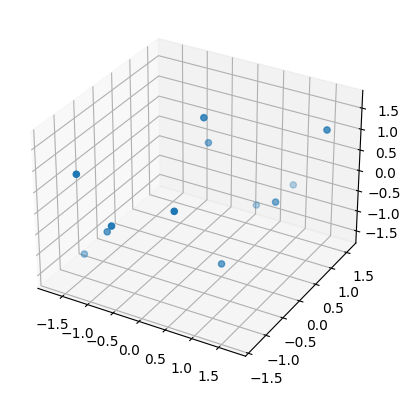

In [24]:
# 기존 데이터 x1,x2,x3 plot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['x1'],data['x2'],data['x3'])
plt.show()

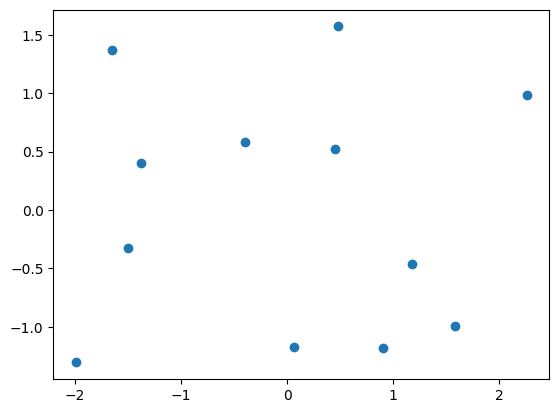

In [28]:
# x1, x3만 사용하여 x1,x3로 만드는 평면에 위치

plt.scatter(new[0],new[1])